# 1. READ DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid", context = 'notebook', palette = 'deep')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
loan_data = pd.read_csv('loan_data_loan.csv')

In [3]:
loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1


In [4]:
loan_data.dtypes


credit_policy          int64
purpose               object
int_rate             float64
installment          float64
log_annual_inc       float64
dti                  float64
fico                   int64
days_with_cr_line    float64
revol_bal              int64
revol_util           float64
inq_last_6mths         int64
delinq_2yrs            int64
pub_rec                int64
not_fully_paid         int64
dtype: object

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9619 entries, 0 to 9618
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9619 non-null   int64  
 1   purpose            9619 non-null   object 
 2   int_rate           9619 non-null   float64
 3   installment        9619 non-null   float64
 4   log_annual_inc     9619 non-null   float64
 5   dti                9594 non-null   float64
 6   fico               9619 non-null   int64  
 7   days_with_cr_line  9611 non-null   float64
 8   revol_bal          9619 non-null   int64  
 9   revol_util         9618 non-null   float64
 10  inq_last_6mths     9619 non-null   int64  
 11  delinq_2yrs        9619 non-null   int64  
 12  pub_rec            9619 non-null   int64  
 13  not_fully_paid     9619 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


1. credit_policy: khách hàng có đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng của công ty Lending credit hay không, thể hiện bằng hai giá trị (0, 1) tương ứng là 1 nếu khách hàng đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng của công ty và 0 là ngược lại.
2. purpose: mục đích khoản vay của khách hàng, bao gồm: 
3. debt_consolidation: hợp nhất nợ (để trả cho nhiều khoản khác)
4. credit_card: mở thẻ tín dụng
5. small_business: kinh doanh nhỏ lẻ
6. home_improvement: sửa nhà
7. educational: giáo dục
8. major_purchase: mua hàng hóa
9. all_other: mục đích khác
10. int_rate: lãi suất của khoản vay.
11. installment: số tiền trả góp hàng tháng mà khách hàng phải trả góp.
12. log_annual_inc: nhật ký thu nhập hàng năm của khách hàng
13. dti: là hệ số nợ trên thu nhập (Debt to Income Ratio) là tỉ lệ phần trăm của tổng thu nhập hàng tháng để trả các khoản thanh toán nợ hàng tháng. 
Công thức: DTI=  (Tổng các khoản thanh toán nợ hàng tháng)/(Tổng thu nhập hàng tháng)
14. fico: điểm FICO là điểm tín dụng của người vay. Các tổ chức tài chính, ngân hàng dựa vào điểm FICO của người vay để đánh giá rủi ro tín dụng và xác định xem có nên cấp tín dụng hay không? 
15. days_with_cr_line: Ngày được cấp hạn mức tín dụng của người vay.
16. revol_bal: Tín dụng quay vòng là một kiểu hạn mức tín dụng mà khách hàng trả một khoản phí cam kết cho một tổ chức tài chính để vay tiền và sau đó được phép sử dụng tiền khi cần thiết. Ví dụ: phổ biến nhất về tín dụng quay vòng là hạn mức tín dụng cá nhân.
17. revol_util: Tỉ lệ sử dụng nợ tín dụng là tỉ lệ phần trăm của tổng nợ tín dụng hiện có của người vay đang được sử dụng. Tỉ lệ sử dụng nợ tín dụng là một yếu tố được áp dụng bởi các cơ quan báo cáo tín dụng để tính điểm tín dụng của người vay.
18. inq_last_6mths: Số lần người vay được công ty tài chính yêu cầu trong 6 tháng qua.
19. delinq_2yrs: Số lần người vay đã quá 30 ngày đến hạn thanh toán trong 2 năm qua.
20. pub_rec: Thông tin về lịch sử tín dụng của bên vay (báo cáo tín dụng) mà bên cho vay có thể sử dụng hợp pháp, để bác bỏ yêu cầu vay hoặc đơn xin vay tín dụng. Bao gồm những việc như phá sản, thanh toán trễ hạn và các khoản vay đã xóa bỏ trước đây.
21. not_fully_paid: thông tin cho biết khoản vay có được hoàn trả hay không, được thể hiện bằng hai giá trị (0, 1) tương ứng với 0 là Khoản vay chưa thanh toán đầy đủ và 1 là Khoản vay đã thanh toán đầy đủ


# 2. DATA CLEAN

In [6]:
# số lượng giá trị null
loan_data.isnull().sum()

credit_policy         0
purpose               0
int_rate              0
installment           0
log_annual_inc        0
dti                  25
fico                  0
days_with_cr_line     8
revol_bal             0
revol_util            1
inq_last_6mths        0
delinq_2yrs           0
pub_rec               0
not_fully_paid        0
dtype: int64

In [7]:
# Xóa giá trị trống 
loan_data.dropna(inplace = True)

In [8]:
# Xóa trùng lặp
loan_data = loan_data.drop_duplicates()

In [9]:
# kiểm tra lại dữ liệu
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.1+ MB


# 3. VISUALIZATION


In [10]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

In [11]:
def barplot_percentages(feature, orient='v', axis_name=""):
    ratios = pd.DataFrame()
    g = loan_data.groupby(feature)["not_fully_paid"].value_counts().to_frame()
    g = g.rename({"not_fully_paid": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(loan_data)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='not_fully_paid', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='not_fully_paid', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

#### not_fully_paid

C:\Users\haiye\AppData\Local\Temp\ipykernel_11080\1720760894.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


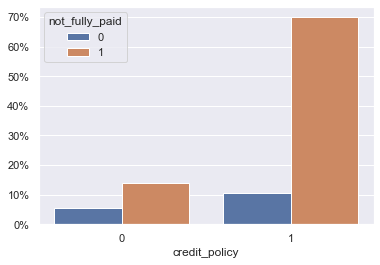

In [12]:
barplot_percentages("credit_policy")

In [13]:
loan_data["not_fully_paid"].value_counts(normalize = True)*100

1    83.994571
0    16.005429
Name: not_fully_paid, dtype: float64

Tỷ lệ khách hàng đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng của công ty Lending credit chiếm khoảng 80% và 20% số khách hàng không đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng. 

Trong đó, khách hàng không đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng của công ty có tỷ lệ không hoàn trả khoản vay (khoảng 30%) cao hơn so với khách hàng đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng của công ty có tỷ lệ không hoàn trả khoản vay thấp hơn (khoảng 12,5%). 

Do đó có thể kết luận khi khách hàng đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng của công ty đưa ra thì có khả năng hoàn trả nợ cao hơn, mang lại ít rủi ro cho công ty.


#### Purpose

In [14]:
risky_loans = loan_data[loan_data["not_fully_paid"]==0]
risky_loans.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,0
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,0
57,1,credit_card,0.1343,678.08,11.884489,10.15,682,4209.958333,41674,74.1,0,0,0,0
65,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,4485,36.9,1,0,0,0
73,1,small_business,0.1501,225.37,12.269047,6.45,677,6240.000000,56411,75.3,0,0,0,0


In [15]:
risky_loans["purpose"].value_counts(normalize = True)*100

debt_consolidation    39.334638
all_other             25.244618
small_business        11.219830
credit_card            9.523810
home_improvement       6.979778
educational            4.500978
major_purchase         3.196347
Name: purpose, dtype: float64

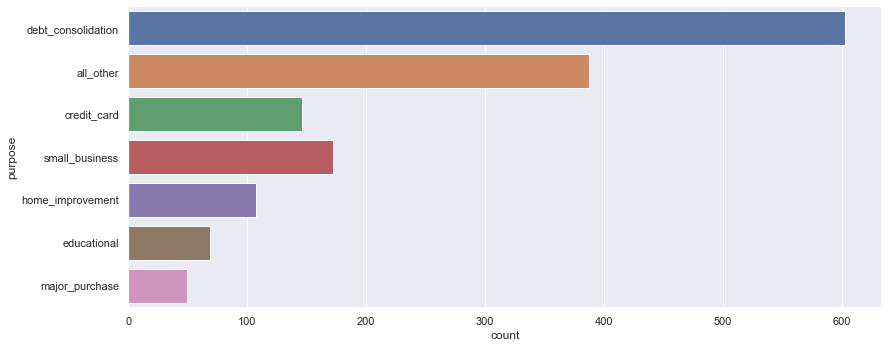

In [16]:
ax = sns.catplot(y="purpose", kind="count", data=risky_loans, height=5, aspect=2.5, orient='h')

C:\Users\haiye\AppData\Local\Temp\ipykernel_11080\1807599246.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))


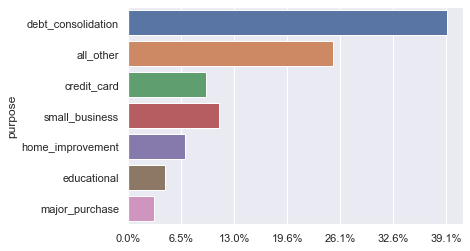

In [17]:
total = len(risky_loans['purpose'])*1
ax = sns.countplot(y="purpose", data=risky_loans)
plt.title('')
plt.xlabel('')

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_y()+0.1, p.get_height()+10))
_ = ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))

Khoảng 39% khách hàng vay để sử dụng cho mục đích hợp nhất nợ (debt_consolidation) đây là khoản chiếm tỷ lệ lớn nhất. Vay để mở thẻ tín dụng (credit_card) chiếm khoảng 13%, khoảng 7% khách hàng vay để dùng cho kinh doanh nhỏ lẻ (small_business), vay để sửa nhà (home_improvement) chiếm khoảng 6%, giáo dục (educational) và mua hàng hóa (major_purchase) lần lượt chiếm 4.8% và 3.7%, vay dùng cho các mục đích khác (all_other) chiếm khoảng 26.5%


In [18]:
loan_data[loan_data["purpose"]=="debt_consolidation"]["not_fully_paid"].value_counts(normalize = True)*100

1    84.761183
0    15.238817
Name: not_fully_paid, dtype: float64

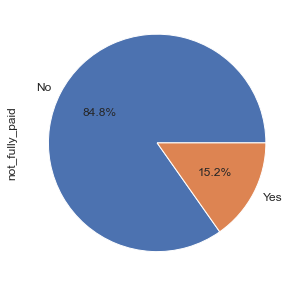

In [19]:
ax = (loan_data[loan_data["purpose"]=="debt_consolidation"]["not_fully_paid"].value_counts()*100.0 /len(loan_data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.set_ylabel('Senior Citizens',fontsize = 12)
# ax.set_title('% of Senior Citizens', fontsize = 12)

Thấy chỉ 15,2% khách hàng vay sử dụng cho hợp nhất nợ (debt_consolidation) được đánh giá là rủi ro, còn 84,8% khách hàng vay sử dụng cho hợp nhất nợ (debt_consolidation) được đánh giá là an toàn

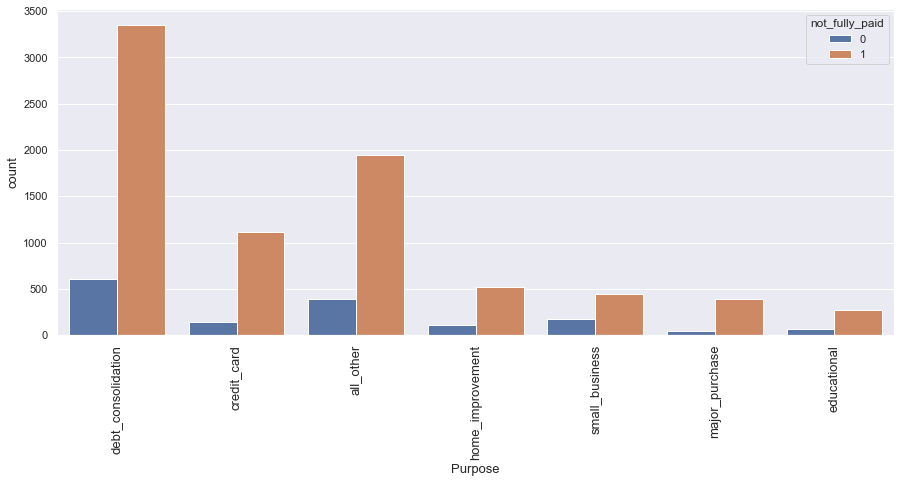

In [20]:
fig = plt.figure(figsize = (15,6))
ax1 = plt.subplot(1,1,1)

sns.countplot(x = "purpose", hue = "not_fully_paid", data = loan_data)
plt.xticks(rotation = 90, fontsize = 13)
plt.title("", fontsize = 16)
plt.xlabel("Purpose", fontsize = 13)
plt.ylabel("count", fontsize = 13)

plt.show()


In [21]:
# Calculating Risky/Total count of loans by purpose
tot_count_of_loans_by_purpose = loan_data.groupby(["purpose"])["not_fully_paid"].count().reset_index()
tot_count_of_risky_loans_by_purpose = loan_data[loan_data["not_fully_paid"]==0].groupby(["purpose"])["not_fully_paid"].count().reset_index()

risky_to_total_ratio_by_purpose = pd.merge(tot_count_of_risky_loans_by_purpose,tot_count_of_loans_by_purpose, on = 'purpose', suffixes = ('_x', '_y'))
risky_to_total_ratio_by_purpose.columns = ["purpose", "Risky","Total"]
risky_to_total_ratio_by_purpose

,purpose,Risky,Total
0,all_other,387,2331
1,credit_card,146,1262
2,debt_consolidation,603,3957
3,educational,69,343
4,home_improvement,107,629
5,major_purchase,49,437
6,small_business,172,619


In [22]:
risky_to_total_ratio_by_purpose["ratio"] = risky_to_total_ratio_by_purpose["Risky"]/risky_to_total_ratio_by_purpose["Total"]*100
risky_to_total_ratio_by_purpose.sort_values("ratio", ascending = False)

,purpose,Risky,Total,ratio
6,small_business,172,619,27.786753
3,educational,69,343,20.116618
4,home_improvement,107,629,17.011129
0,all_other,387,2331,16.602317
2,debt_consolidation,603,3957,15.238817
1,credit_card,146,1262,11.568938
5,major_purchase,49,437,11.212815


#### Interest Rate

In [23]:
loan_data.groupby("not_fully_paid").agg({'int_rate':['min','max','mean']})

int_rate                  
                    min     max      mean
not_fully_paid                           
0                0.0705  0.2164  0.132452
1                0.0600  0.2121  0.120770

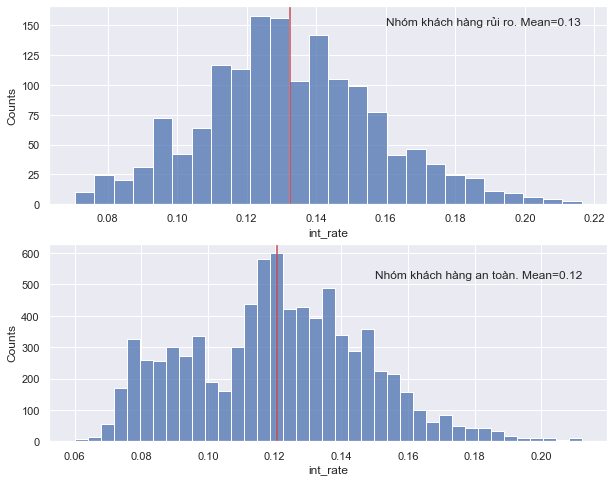

In [24]:
fig = plt.figure(figsize = (10,8))

ax1 = plt.subplot(211)

sns.histplot(loan_data[loan_data["not_fully_paid"]==0]["int_rate"], kde = False)
plt.axvline(x = loan_data[loan_data["not_fully_paid"]==0]["int_rate"].mean(), color = 'r') # Mean line
plt.ylabel("Counts")
plt.text(0.16,150,"Nhóm khách hàng rủi ro. Mean={}".format(round(loan_data[loan_data["not_fully_paid"]==0]["int_rate"].mean(),2)), fontsize =12)


ax2 = plt.subplot(212)
sns.histplot(loan_data[loan_data["not_fully_paid"]==1]["int_rate"], kde = False)
plt.axvline(x = loan_data[loan_data["not_fully_paid"]==1]["int_rate"].mean(), color = 'r') # Mean line
plt.ylabel("Counts")
plt.text(0.15,520,"Nhóm khách hàng an toàn. Mean={}".format(round(loan_data[loan_data["not_fully_paid"]==1]["int_rate"].mean(),2)), fontsize =12)

plt.show()

•	Đối với nhóm khách hàng rủi ro, lãi suất cho vay trong khoảng từ 7 % đến 22%, lãi suất trung bình rơi vào khoảng 13% 

•	Đối với nhóm khách hàng an toàn, lãi suất cho vay trong khoảng từ 6 % đến 21%, lãi suất trung bình rơi vào khoảng 12% 

=> lãi suất trung bình cho các khoản vay rủi ro cao hơn khoảng 1-2% so với các khoản vay an toàn.


#### DTI

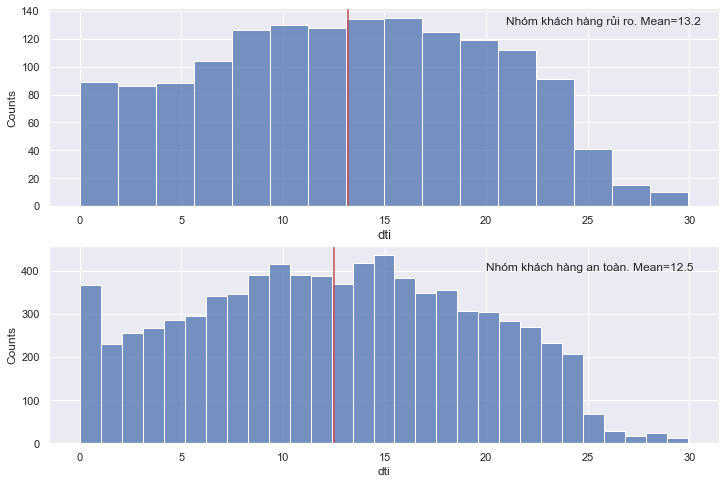

In [25]:
fig = plt.figure(figsize = (12,8))

ax1 = plt.subplot(211)
sns.histplot(loan_data[loan_data["not_fully_paid"]==0]["dti"], kde = False)
plt.axvline(x = loan_data[loan_data["not_fully_paid"]==0]["dti"].mean(), color = 'r') # Mean line
plt.ylabel("Counts")
plt.xlabel("dti", fontsize = 13)
plt.text(21,130,"Nhóm khách hàng rủi ro. Mean={}".format(round(loan_data[loan_data["not_fully_paid"]==0]["dti"].mean(),1)), fontsize =12)


ax2 = plt.subplot(212)
sns.histplot(loan_data[loan_data["not_fully_paid"]==1]["dti"], kde = False)
plt.axvline(x = loan_data[loan_data["not_fully_paid"]==1]["dti"].mean(), color = 'r') # Mean line
plt.ylabel("Counts")
plt.text(20,400,"Nhóm khách hàng an toàn. Mean={}".format(round(loan_data[loan_data["not_fully_paid"]==1]["dti"].mean(),1)), fontsize =12)

plt.show()

•	Đối với nhóm khách hàng rủi ro chỉ số DTI trung bình khoảng 13.2% 

•	Đối với nhóm khách hàng an toàn chỉ số DTI trung bình khoảng 12.5% 

=> Tỷ lệ Nợ/ Thu nhập của các khoản vay rủi ro cao hơn so với các khoản vay an toàn.


In [26]:
mean_dti_by_purpose_policy= loan_data.groupby(["purpose","not_fully_paid"])["dti"].mean().reset_index()
mean_dti_by_purpose_policy

,purpose,not_fully_paid,dti
0,all_other,0,11.899897
1,all_other,1,10.916178
2,credit_card,0,14.581849
3,credit_card,1,14.036281
4,debt_consolidation,0,14.743350
5,debt_consolidation,1,13.956565
6,educational,0,12.167101
7,educational,1,11.137883
8,home_improvement,0,11.084299
9,home_improvement,1,10.015728


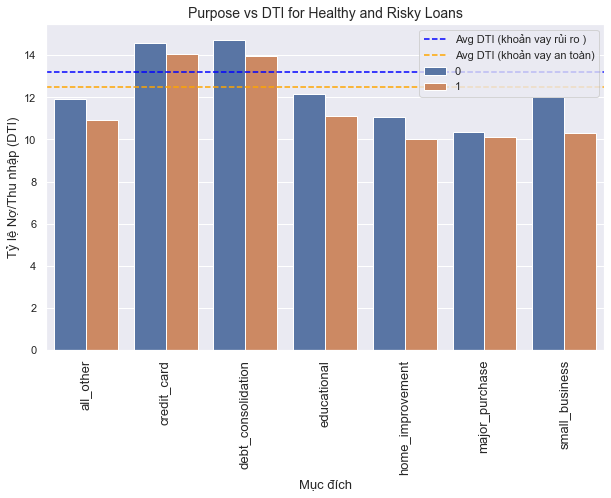

In [27]:
fig = plt.figure(figsize = (10,6))
ax1 = plt.subplot(1,1,1)

sns.barplot(data = mean_dti_by_purpose_policy,x ="purpose" , y="dti", hue = "not_fully_paid")
plt.xticks(rotation = 90, fontsize = 13)
plt.ylabel("Tỷ lệ Nợ/Thu nhập (DTI)", fontsize = 13)
plt.xlabel("Mục đích", fontsize = 13)
plt.title("Purpose vs DTI for Healthy and Risky Loans", fontsize = 14)

ax2 = ax2.twinx().twiny()
plt.axhline(y = loan_data[loan_data["not_fully_paid"]==0]["dti"].mean(), color = 'blue', linestyle = '--', label = "Avg DTI (khoản vay rủi ro )")
plt.axhline(y = loan_data[loan_data["not_fully_paid"]==1]["dti"].mean(), color = 'orange', linestyle = '--', label = "Avg DTI (khoản vay an toàn)")
plt.legend(loc = 1)
plt.show()

•	Tỷ lệ Nợ/ Thu nhập (DTI) càng cao, khả năng rủi ro càng cao. 

•	DTI trung bình đối với một khoản vay an toàn là 12,5. Tuy nhiên, DTI với các giá trị thấp đến 10,5 cũng có thể rủi ro.
 
•	Tỷ lệ Nợ/Thu nhập của các khoản vay cho mục đích hợp nhất nợ (debt_consolidation) và mở thẻ tín dụng (credit_card) cao hơn so với tỷ lệ Nợ/Thu nhập đối với mục đích vay khác


#### FICO

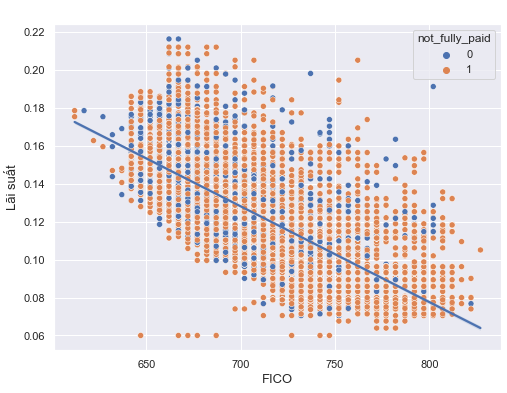

In [28]:
from matplotlib import patches
fig = plt.figure(figsize = (8,6))
ax1 = plt.subplot(111)

sns.scatterplot(data = loan_data[["fico", "int_rate","not_fully_paid"]], x = "fico", y = "int_rate", color = 'b', hue = "not_fully_paid")
sns.regplot(data = loan_data[["fico", "int_rate"]], x = "fico", y = "int_rate", color = 'b', scatter = False)
plt.title(" ", fontsize = 14)
plt.ylabel("Lãi suất", fontsize = 13)
plt.xlabel("FICO", fontsize = 13)
# rect = patches.Rectangle((660,0.055),100,0.02,edgecolor = "r", fill = False, linewidth = 2)
# ax1.add_patch(rect)
# plt.text(625,0.08,"Poor FICO score,\nLow Interest Rates and healthy", fontsize = 12, color = "r", fontweight = "semibold", )
plt.show()

=> Điểm FICO càng cao, lãi suất càng thấp. Ngoài ra, điểm tín dụng cao hơn có độ tin cậy rủi ro tốt hơn, tuy nhiên, có một số trường hợp lãi suất thấp mặc dù điểm FICO rất kém. Khả năng là do chính sách giải ngân khoản vay với các ưu đãi đã được cấp.

Text(0.5, 0, 'FICO')

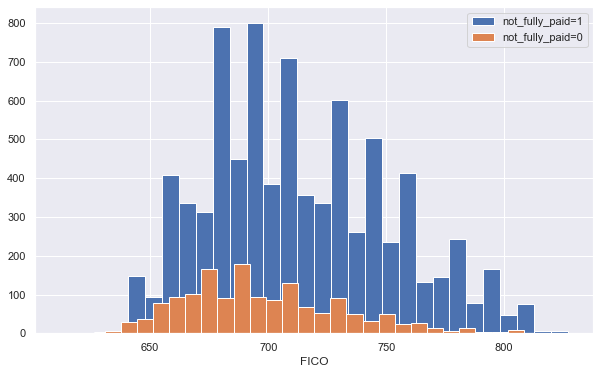

In [29]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
plt.hist(loan_data['fico'].loc[loan_data['not_fully_paid']==1], bins=30, label='not_fully_paid=1')
plt.hist(loan_data['fico'].loc[loan_data['not_fully_paid']==0], bins=30, label='not_fully_paid=0')
plt.legend()
plt.xlabel('FICO')

Nhóm khách hàng rủi ro có điểm FICO thấp so với nhóm khách hàng an toàn. 

•	Số lượng khách hàng của nhóm khách hàng rủi ro chủ yếu có điểm FICO từ 650 đến 720 điểm

•	Số lượng khách hàng có điểm FICO từ 750 trở lên của nhóm khách hàng rủi ro ít hơn rất nhiều so với nhóm khách hàng an toàn.  


#### days_with_cr_line

In [30]:
df_cr_line_policy = loan_data.loc[:,("not_fully_paid", "days_with_cr_line")]
df_cr_line_policy["cr line duration in years"] = np.round(df_cr_line_policy["days_with_cr_line"].apply(lambda x: x/365.25),2)
df_cr_line_policy.head()

,not_fully_paid,days_with_cr_line,cr line duration in years
0,1,5639.958333,15.44
1,1,2760.000000,7.56
2,1,4710.000000,12.90
3,1,2699.958333,7.39
4,1,4066.000000,11.13


In [31]:
#Let's group the years in short term, medium term, long term and very long term loans
def duration_type(y):
    if (0<=y) & (y<=3) :
        return "Short Term"
    elif (4<=y) & (y<=10):
        return "Medium Term"
    elif (11<=y) & (y<=20):
        return "Long Term"
    elif y>=21:
        return "Very Long Term"

df_cr_line_policy["Duration_Type"] = df_cr_line_policy["cr line duration in years"].apply(lambda x : duration_type(x))
df_cr_line_policy.sort_values(["cr line duration in years"])

,not_fully_paid,days_with_cr_line,cr line duration in years,Duration_Type
8156,0,180.041667,0.49,Short Term
8184,1,180.041667,0.49,Short Term
8223,1,180.041667,0.49,Short Term
7759,1,178.958333,0.49,Short Term
8207,1,183.041667,0.50,Short Term
...,...,...,...,...
8531,1,16260.000000,44.52,Very Long Term
6014,1,16350.000000,44.76,Very Long Term
5801,1,16652.000000,45.59,Very Long Term
7553,1,17616.000000,48.23,Very Long Term


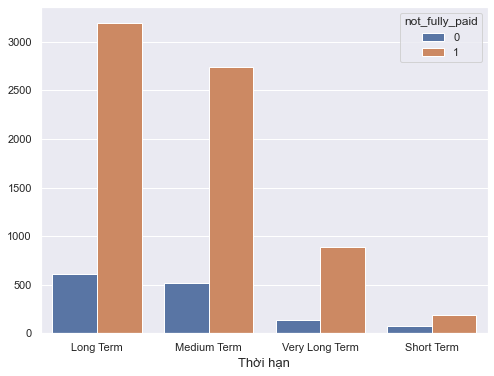

In [32]:
plt.figure(figsize = (8,6))
ax1 = plt.subplot(111)

sns.countplot(data = df_cr_line_policy, x = "Duration_Type", hue = "not_fully_paid" )
plt.title("", fontsize = 14)
plt.xlabel("Thời hạn", fontsize = 13)
plt.ylabel("", fontsize = 13)

plt.show()

=> Các khoản vay dài hạn ít rủi ro hơn các khoản vay ngắn hạn. Các khoản vay có thời hạn rất dài cũng ít rủi ro hơn so với các khoản vay trung và dài hạn.

In [33]:
loan_data

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = loan_data.copy(deep = True)
text_data_features = [i for i in list(loan_data.columns) if i not in list(loan_data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
purpose  :  [2 1 0 4 6 5 3]  =  ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


In [35]:
df1.head(6)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,1
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,1
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,1
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1
5,1,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,1


Hệ số tương quan: 
not_fully_paid       1.000000
credit_policy        0.158119
fico                 0.149666
log_annual_inc       0.033439
days_with_cr_line    0.029237
delinq_2yrs         -0.008881
dti                 -0.037362
purpose             -0.047907
pub_rec             -0.048634
installment         -0.049955
revol_bal           -0.053699
revol_util          -0.082088
inq_last_6mths      -0.149452
int_rate            -0.159552
Name: not_fully_paid, dtype: float64


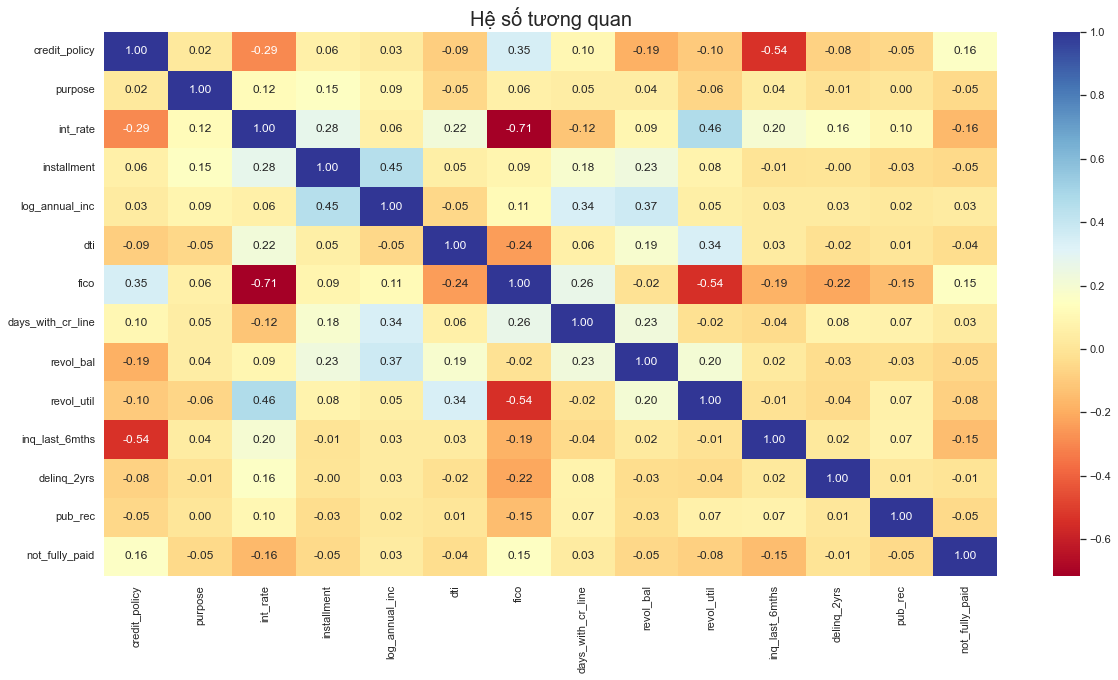

In [36]:
corrmat = df1.corr()
print(f"Hệ số tương quan: \n{corrmat.sort_values(by = ['not_fully_paid'], ascending=False).iloc[0].sort_values(ascending=False)}")

plt.figure(figsize = (20,10))
sns.heatmap(corrmat, fmt = ".2f", cmap="RdYlBu", annot = True)
plt.title('Hệ số tương quan', fontsize = 20)
plt.show()

# StandardScaler

In [37]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['credit_policy'] = mms.fit_transform(df1[['credit_policy']])
df1['purpose'] = mms.fit_transform(df1[['purpose']])
df1['int_rate'] = mms.fit_transform(df1[['int_rate']])
df1['installment'] = mms.fit_transform(df1[['installment']])
df1['log_annual_inc'] = mms.fit_transform(df1[['log_annual_inc']])
df1['dti'] = mms.fit_transform(df1[['dti']])
df1['fico'] = mms.fit_transform(df1[['fico']])
df1['days_with_cr_line'] = mms.fit_transform(df1[['days_with_cr_line']])
df1['revol_bal'] = mms.fit_transform(df1[['revol_bal']])
df1['revol_util'] = mms.fit_transform(df1[['revol_util']])
df1['inq_last_6mths'] = mms.fit_transform(df1[['inq_last_6mths']])
df1['delinq_2yrs'] = mms.fit_transform(df1[['delinq_2yrs']])
df1['pub_rec'] = mms.fit_transform(df1[['pub_rec']])
df1.head(6)


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1.0,0.333333,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000,0.000000,0.0,1
1,1.0,0.166667,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000,0.000000,0.0,1
2,1.0,0.333333,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303,0.000000,0.0,1
3,1.0,0.333333,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303,0.000000,0.0,1
4,1.0,0.166667,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000,0.076923,0.0,1
5,1.0,0.166667,0.120205,0.118403,0.624203,0.566756,0.534884,0.340249,0.042081,0.428571,0.000000,0.000000,0.0,1


# CHIA TRAIN TEST

In [38]:
x = df1.iloc[:,:13].values
y = df1.iloc[:,13].values

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

# MODELLING

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, plot_roc_curve



## 1. NO SMOTE

In [41]:
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### 1.1 Logistic 

In [42]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

# Logistic Regression
model_log = LogisticRegression() 
model_log.fit(x_train, y_train)
y_pred = model_log.predict(x_test)

              precision    recall  f1-score   support

           0       0.25      0.00      0.01       306
           1       0.84      1.00      0.91      1610

    accuracy                           0.84      1916
   macro avg       0.55      0.50      0.46      1916
weighted avg       0.75      0.84      0.77      1916

Accuracy  0.83925
Recall    0.99814
Precision 0.84048
F1-score  0.91255


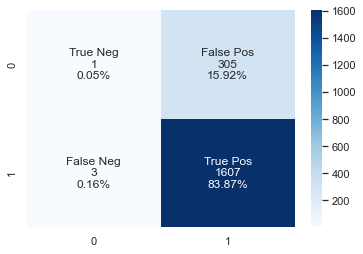

In [43]:
model_evaluation(model_log,x_test,y_test)
print(f"Accuracy  {round(accuracy_score(y_test, y_pred),5)}")
print(f"Recall    {round(recall_score(y_test, y_pred),5)}")
print(f"Precision {round(precision_score(y_test, y_pred),5)}")
print(f"F1-score  {round(f1_score(y_test, y_pred),5)}")

0.5007


C:\Users\haiye\AppData\Local\Temp\ipykernel_11080\1195671369.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


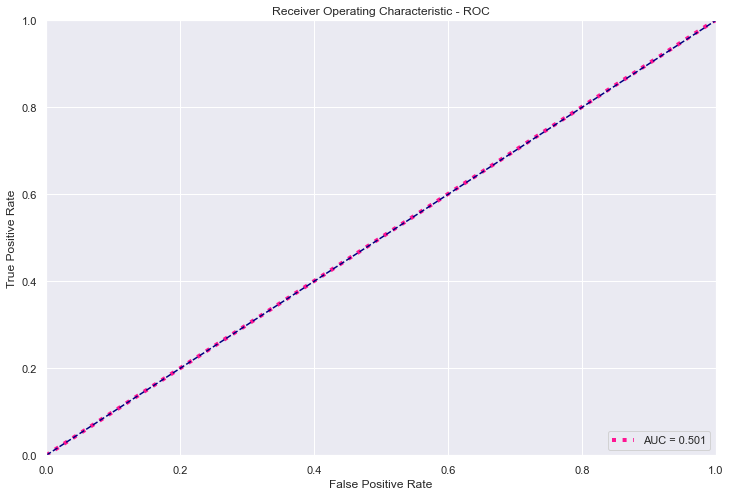

In [44]:
fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(y_test, y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.3f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### 1.2 Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

              precision    recall  f1-score   support

           0       0.22      0.24      0.23       306
           1       0.85      0.84      0.85      1610

    accuracy                           0.74      1916
   macro avg       0.54      0.54      0.54      1916
weighted avg       0.75      0.74      0.75      1916

Accuracy  0.74217
Recall    0.83727
Precision 0.85316
F1-score  0.84514


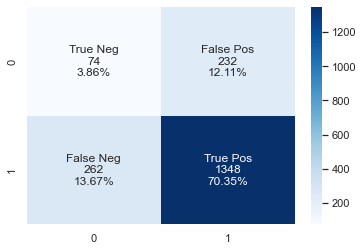

In [46]:
model_evaluation(dtree,x_test,y_test)
print(f"Accuracy  {round(accuracy_score(y_test, y_pred),5)}")
print(f"Recall    {round(recall_score(y_test, y_pred),5)}")
print(f"Precision {round(precision_score(y_test, y_pred),5)}")
print(f"F1-score  {round(f1_score(y_test, y_pred),5)}")

0.53955


C:\Users\haiye\AppData\Local\Temp\ipykernel_11080\3743275621.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


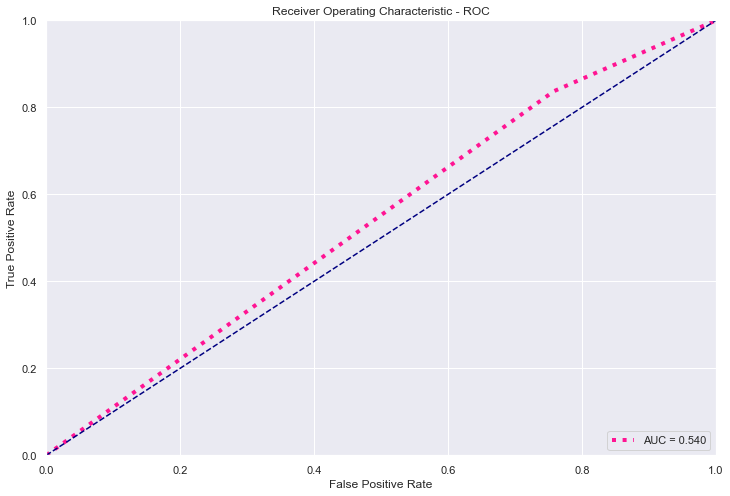

In [47]:
fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(y_test, y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.3f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.3 Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train, y_train)

y_pred = classifier_rf.predict(x_test)

              precision    recall  f1-score   support

           0       0.30      0.02      0.04       306
           1       0.84      0.99      0.91      1610

    accuracy                           0.84      1916
   macro avg       0.57      0.51      0.47      1916
weighted avg       0.76      0.84      0.77      1916

Accuracy  0.83612
Recall    0.9913
Precision 0.84177
F1-score  0.91044


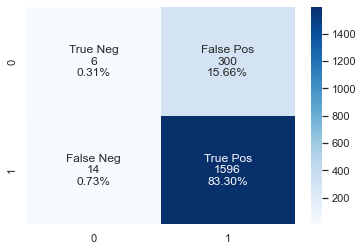

In [49]:
model_evaluation(classifier_rf,x_test,y_test)
print(f"Accuracy  {round(accuracy_score(y_test, y_pred),5)}")
print(f"Recall    {round(recall_score(y_test, y_pred),5)}")
print(f"Precision {round(precision_score(y_test, y_pred),5)}")
print(f"F1-score  {round(f1_score(y_test, y_pred),5)}")

0.50546


C:\Users\haiye\AppData\Local\Temp\ipykernel_11080\3743275621.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


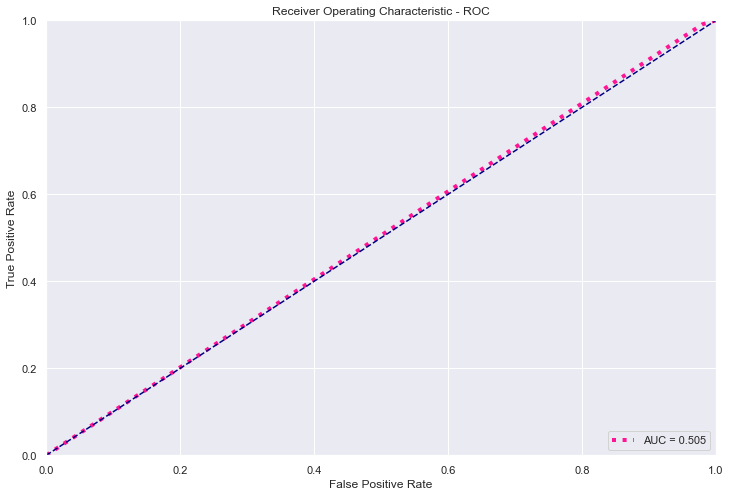

In [50]:
fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(y_test, y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.3f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.4 XGBoost

In [51]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_test)

c:\Users\haiye\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\haiye\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

           0       0.33      0.08      0.14       306
           1       0.85      0.97      0.90      1610

    accuracy                           0.83      1916
   macro avg       0.59      0.53      0.52      1916
weighted avg       0.77      0.83      0.78      1916

Accuracy  0.82672
Recall    0.9677
Precision 0.84766
F1-score  0.90371


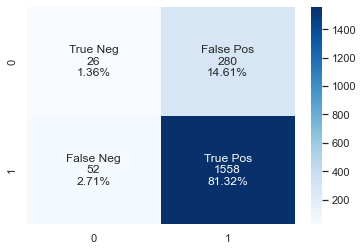

In [52]:
model_evaluation(model_xgb,x_test,y_test)
print(f"Accuracy  {round(accuracy_score(y_test, y_pred),5)}")
print(f"Recall    {round(recall_score(y_test, y_pred),5)}")
print(f"Precision {round(precision_score(y_test, y_pred),5)}")
print(f"F1-score  {round(f1_score(y_test, y_pred),5)}")

0.52633


C:\Users\haiye\AppData\Local\Temp\ipykernel_11080\3743275621.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


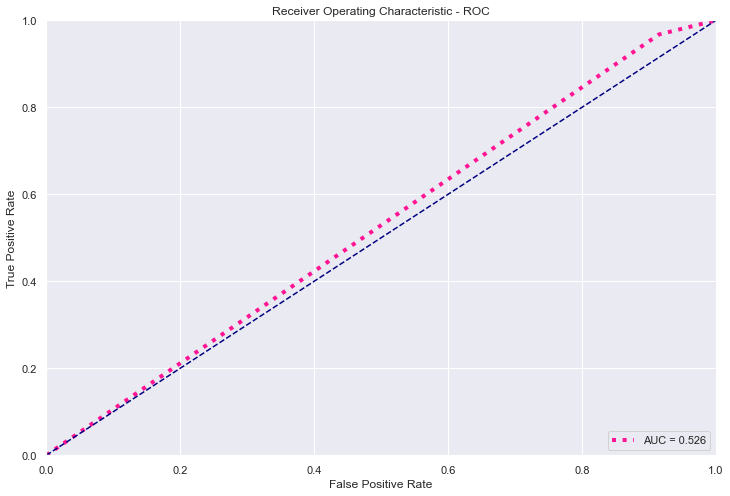

In [53]:
fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(y_test, y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.3f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2. SMOTE

In [54]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [55]:
over = SMOTE(sampling_strategy = 1)
x_train_smote, y_train_smote = over.fit_resample(x_train, y_train)
x_test, y_test = over.fit_resample(x_test, y_test)

In [56]:
# Check balance
Counter(y_train)

Counter({1: 6435, 0: 1227})

In [57]:
# Check xem balance chưa
Counter(y_train_smote)

Counter({1: 6435, 0: 6435})

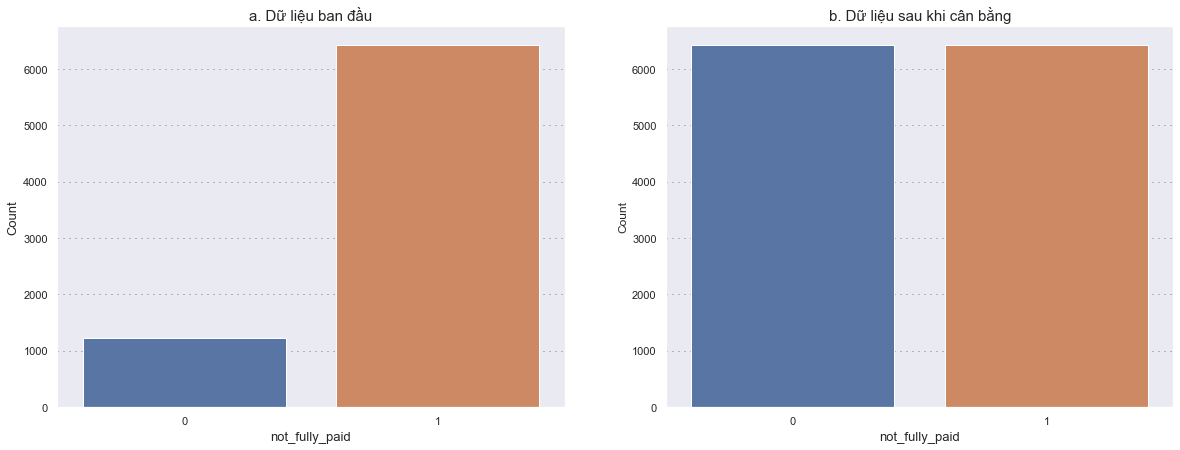

In [58]:
fig = plt.figure(figsize=(20,7))
gs = fig.add_gridspec(1 ,2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

sns.countplot(data= df1, x = y_train, ax = ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('a. Dữ liệu ban đầu', fontsize= 15)
ax0.set_xlabel("not_fully_paid", fontsize= 13)
ax0.set_ylabel("Count", fontsize= 13)

sns.countplot(data= df1, x = y_train_smote, ax = ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('b. Dữ liệu sau khi cân bằng', fontsize= 15)
ax1.set_xlabel("not_fully_paid", fontsize= 13)
ax1.set_ylabel("Count")

plt.show()

In [59]:
def model_evaluation_smote(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### 2.1 LogisticRegression

In [60]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

# Logistic Regression
model_log_smote = LogisticRegression() 
model_log_smote.fit(x_train_smote, y_train_smote)
y_pred = model_log_smote.predict(x_test)

              precision    recall  f1-score   support

           0       0.62      0.58      0.60      1610
           1       0.61      0.65      0.63      1610

    accuracy                           0.61      3220
   macro avg       0.62      0.61      0.61      3220
weighted avg       0.62      0.61      0.61      3220

Accuracy  0.6146
Recall    0.6472
Precision 0.60758
F1-score  0.62677


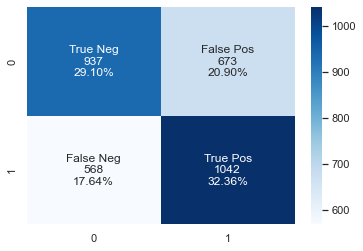

In [61]:
model_evaluation_smote(model_log_smote,x_test,y_test)
print(f"Accuracy  {round(accuracy_score(y_test, y_pred),5)}")
print(f"Recall    {round(recall_score(y_test, y_pred),5)}")
print(f"Precision {round(precision_score(y_test, y_pred),5)}")
print(f"F1-score  {round(f1_score(y_test, y_pred),5)}")

0.6146


C:\Users\haiye\AppData\Local\Temp\ipykernel_11080\1195671369.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


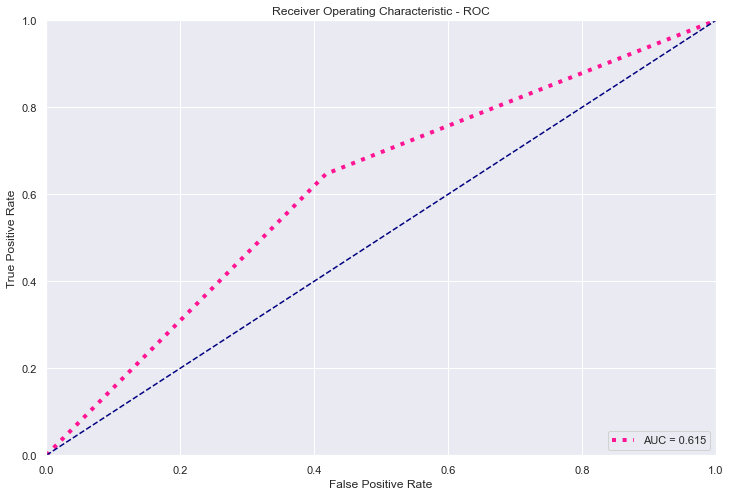

In [62]:
fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(y_test, y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.3f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### 2.2 DecisionTreeClassifier 

In [63]:
from sklearn.tree import DecisionTreeClassifier

dtree_smote = DecisionTreeClassifier()
dtree_smote.fit(x_train_smote, y_train_smote)

y_pred = dtree_smote.predict(x_test)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1610
           1       0.74      0.83      0.78      1610

    accuracy                           0.77      3220
   macro avg       0.77      0.77      0.77      3220
weighted avg       0.77      0.77      0.77      3220

Accuracy  0.77143
Recall    0.82609
Precision 0.74468
F1-score  0.78327


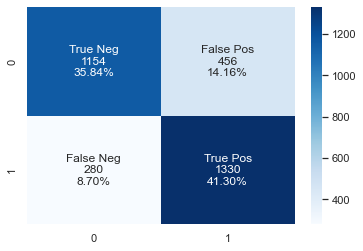

In [64]:
model_evaluation_smote(dtree_smote,x_test,y_test)
print(f"Accuracy  {round(accuracy_score(y_test, y_pred),5)}")
print(f"Recall    {round(recall_score(y_test, y_pred),5)}")
print(f"Precision {round(precision_score(y_test, y_pred),5)}")
print(f"F1-score  {round(f1_score(y_test, y_pred),5)}")

0.77143


C:\Users\haiye\AppData\Local\Temp\ipykernel_11080\3743275621.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


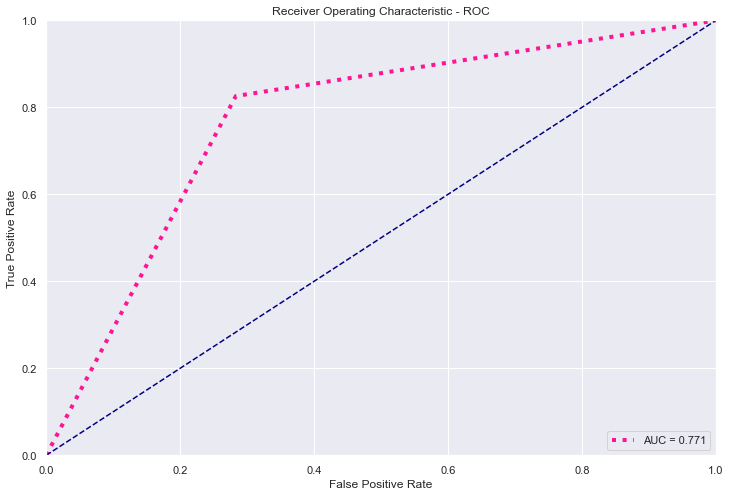

In [65]:
fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(y_test, y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.3f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2.3 RandomForest

In [66]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf_smote = RandomForestClassifier()
classifier_rf_smote.fit(x_train_smote, y_train_smote)

y_pred = classifier_rf_smote.predict(x_test)

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1610
           1       0.72      0.94      0.82      1610

    accuracy                           0.79      3220
   macro avg       0.82      0.79      0.79      3220
weighted avg       0.82      0.79      0.79      3220

Accuracy  0.79099
Recall    0.93975
Precision 0.72427
F1-score  0.81806


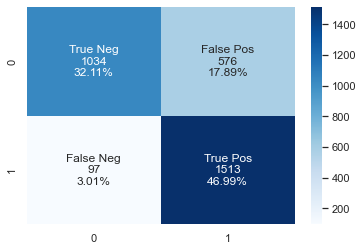

In [67]:
model_evaluation_smote(classifier_rf_smote,x_test,y_test)
print(f"Accuracy  {round(accuracy_score(y_test, y_pred),5)}")
print(f"Recall    {round(recall_score(y_test, y_pred),5)}")
print(f"Precision {round(precision_score(y_test, y_pred),5)}")
print(f"F1-score  {round(f1_score(y_test, y_pred),5)}")

0.79099


C:\Users\haiye\AppData\Local\Temp\ipykernel_11080\3743275621.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


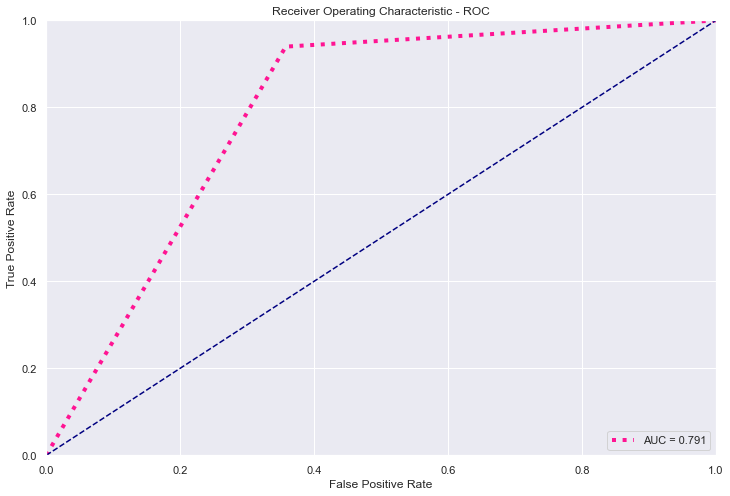

In [68]:
fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(y_test, y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.3f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2.4 XGBoost

In [69]:
from xgboost import XGBClassifier

model_xgb_smote = XGBClassifier(random_state=42, n_estimators = 200)
model_xgb_smote.fit(x_train_smote, y_train_smote)

y_pred = model_xgb_smote.predict(x_test)

c:\Users\haiye\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:58:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1610
           1       0.81      0.94      0.87      1610

    accuracy                           0.86      3220
   macro avg       0.87      0.86      0.86      3220
weighted avg       0.87      0.86      0.86      3220

Accuracy  0.86366
Recall    0.94472
Precision 0.81293
F1-score  0.87389


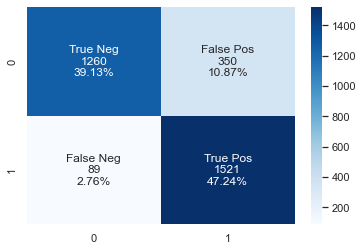

In [70]:
model_evaluation_smote(model_xgb_smote,x_test,y_test)
print(f"Accuracy  {round(accuracy_score(y_test, y_pred),5)}")
print(f"Recall    {round(recall_score(y_test, y_pred),5)}")
print(f"Precision {round(precision_score(y_test, y_pred),5)}")
print(f"F1-score  {round(f1_score(y_test, y_pred),5)}")

0.86366


C:\Users\haiye\AppData\Local\Temp\ipykernel_11080\3743275621.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


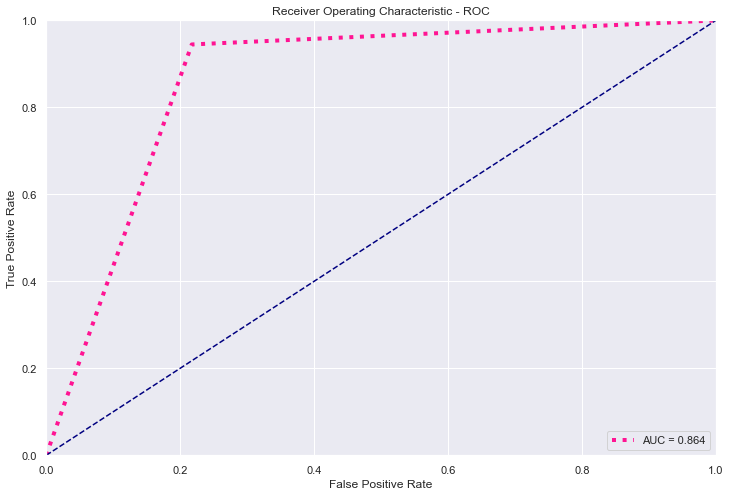

In [71]:
fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(y_test, y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.3f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

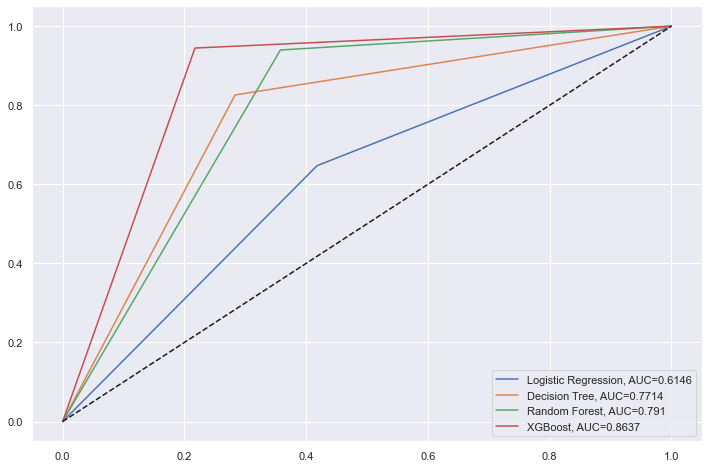

In [72]:
from sklearn import metrics
plt.figure(figsize=(12, 8)).clf()

# Logistic Regression
y_pred = model_log_smote.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

# Decision Tree
y_pred = dtree_smote.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

# Random Forest
y_pred = classifier_rf_smote.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

# XGBoost
y_pred = model_xgb_smote.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

#add legend
plt.legend()
plt.plot([0, 1], [0, 1], 'k--' )

Qua quá trình nghiên cứu, trực quan hóa dữ liệu với các biến độc lập và biến phụ thuộc ở trên, tôi rút ra một số kết luận như sau:
-	Trong tổng số khách hàng có khoản vay tại công ty Lending credit, tỷ lệ khách hàng đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng chiếm khoảng 80% và 20% số khách hàng không đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng. Trong đó, khách hàng không đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng của công ty có tỷ lệ không hoàn trả khoản vay (khoảng 30%) cao hơn so với khách hàng đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng của công ty có tỷ lệ không hoàn trả khoản vay thấp hơn (khoảng 12,5%)
-	Các khoản vay của khách hàng được sử dụng với nhiều mục đích vay khác nhau, chỉ xét riêng với nhóm khách hàng “rủi ro” có khoảng 39% khách hàng vay để sử dụng cho mục đích hợp nhất nợ (debt_consolidation) đây là khoản chiếm tỷ lệ lớn nhất. Vay để mở thẻ tín dụng (credit_card) chiếm khoảng 13%, khoảng 7% khách hàng vay để dùng cho kinh doanh nhỏ lẻ (small_business), vay để sửa nhà (home_improvement) chiếm khoảng 6%, giáo dục (educational) và mua hàng hóa (major_purchase) lần lượt chiếm 4.8% và 3.7%, vay dùng cho các mục đích khác (all_other) chiếm khoảng 26.5%.
-	Lãi suất trung bình cho các khoản vay rủi ro cao hơn khoảng 1-2% so với các khoản vay an toàn. Đối với nhóm khách hàng rủi ro, lãi suất cho vay trong khoảng từ 7 % đến 22%, lãi suất trung bình rơi vào khoảng 13%. Đối với nhóm khách hàng an toàn, lãi suất cho vay trong khoảng từ 6 % đến 21%, lãi suất trung bình rơi vào khoảng 12% 
-	Tỷ lệ Nợ/ Thu nhập (DTI) càng cao khả năng rủi ro càng cao, tỷ lệ Nợ/ Thu nhập của các khoản vay rủi ro cao hơn so với các khoản vay an toàn. Đối với khách hàng rủi ro chỉ số DTI trung bình khoảng 13.2%, đối với nhóm khách hàng an toàn chỉ số DTI trung bình khoảng 12.5%. Trong đó, tỷ lệ Nợ/Thu nhập của các khoản vay cho mục đích hợp nhất nợ (debt_consolidation) và mở thẻ tín dụng (credit_card) cao hơn so với tỷ lệ Nợ/Thu nhập đối với mục đích vay khác.
-	Điểm tín dụng (FICO) cao có độ tin cậy rủi ro tốt hơn, lãi suất thấp. Tuy nhiên có một số trường hợp lãi suất thấp mặc dù điểm FICO rất kém có thể là do chính sách giải ngân khoản vay với các ưu đãi đã được cấp.
-	Nhóm khách hàng rủi ro có điểm FICO thấp so với nhóm khách hàng an toàn. Hầu hết khách hàng của nhóm khách hàng rủi ro chủ yếu có điểm tín dụng từ 650 đến 720 điểm. Số lượng khách hàng có điểm FICO từ 750 trở lên của nhóm khách hàng rủi ro ít hơn rất nhiều so với nhóm khách hàng an toàn.  
-	Các khoản vay dài hạn (11 đến 20 năm) ít rủi ro hơn các khoản vay ngắn hạn (0 đến 3 năm). Các khoản vay thời hạn rất dài (>20 năm) cũng ít rủi ro hơn so với các khoản vay trung hạn (4 đến 10 năm) và dài hạn.

Với các thông tin rút ra từ quá trình phân tích và trực quan hóa dữ liệu, không chỉ giúp công ty có thể đưa ra phương pháp đánh giá khách hàng là an toàn hay rủi ro, dự đoán khả năng hoàn trả khoản vay của khách hàng trước khi đưa ra quyết định cho vay. Ngoài ra, còn giúp công ty hiểu thêm về khách hàng của mình hỗ trợ các nhà quản lý, hoạch định đưa ra các biện pháp để giải quyết các vấn đề về chính sách của khách hàng mà công ty đang gặp phải hoặc chính sách trong tương lai.

Tập dữ liệu được chia làm hai phần: dữ liệu huấn luyện (training data) và dữ liệu kiểm tra (testing data) bằng phương pháp lấy mẫu ngẫu nhiên không hoàn lại. Dữ liệu huấn luyện chiếm 80% tổng quan sát, còn dữ liệu kiểm tra bao gồm 20% số quan sát còn lại. Trong tập dữ liệu huấn luyện (tập train), khách hàng rủi ro chỉ chiếm 15,9% tổng số khách hàng, còn nhóm khách hàng an toàn chiếm 84,1%, tỷ lệ giữa nhóm khách hàng an toàn cao hơn rất nhiều so với nhóm khách hàng rủi ro. Do đó, phương pháp SMOTE được sử dụng để giải quyết vấn đề cân bằng dữ liệu, làm giảm sự ảnh hưởng đến hiệu suất của mô hình, giúp mô hình mang lại kết quả phân loại tốt hơn.

Mô hình sử dụng để xây dựng mô hình dự báo bao gồm các mô hình sau: Hồi quy Logistic, Cây quyết định, Rừng ngẫu nhiên và XGBoost. Qua quá trình huấn luyện và đánh giá kết quả, ta thấy rằng mô hình Rừng ngẫu nhiên (Random Forest) cho kết quả tốt nhất với cả 5 chỉ số Accuracy, Precision, F1-score và AUC đều cao hơn so với ba mô hình còn lại và mô hình Hồi quy Logistic có kết quả kém nhất. Do đó đề xuất hai mô hình có thể ứng dụng trong quản trị rủi ro tín dụng, dự đoán người vay có khả năng hoàn trả hoàn vay không đó là: mô hình XGBoost và mô hình Rừng ngẫu nhiên (Random Forest). 
Kết quả nghiên cứu và mô hình dự báo trên có thể giúp công ty tài chính trong việc đánh giá khả năng trả nợ của khách hàng. Đối với những khách hàng đã có các khoản vay cũng như khách hàng mới, phân loại khách hàng “an toàn”/ “rủi ro” để từ đó đưa ra những biện pháp, chính sách phù hợp với từng đối tượng khách hàng nhằm giảm thiểu rủi ro đối với những khoản vay.
